**In a previous professional role, I undertook a fundamental statistical analysis project. What you see below is a simplified version of that project.  To enhance clarity for non-technical readers, I incorporated theoretical explanations in certain sections. The data and names have been altered to maintain confidentiality. Should you have specific questions or need assistance regarding this analysis, please don't hesitate to provide details.**

In [1]:
#https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/01_intro.html
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df= pd.read_csv('/content/drive/MyDrive/colab file/Salesovertime.csv')

In [4]:
df.shape

(299, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          299 non-null    object
 1   Device         299 non-null    object
 2   Sales_channel  299 non-null    object
 3   Traffic        299 non-null    object
 4   Sales          299 non-null    int64 
 5   LCV            299 non-null    int64 
 6   Cost           299 non-null    int64 
 7   Cross sales    299 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 18.8+ KB


We need to change the data type of Month from object to data, DEVICE_TYPE to category, and Sales_channel to category as well.

In [6]:
df['Month'] = pd.to_datetime(df['Month'])

In [7]:
for col in ['Device','Sales_channel','Traffic']:
  df[col]=df[col].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Month          299 non-null    datetime64[ns]
 1   Device         299 non-null    category      
 2   Sales_channel  299 non-null    category      
 3   Traffic        299 non-null    category      
 4   Sales          299 non-null    int64         
 5   LCV            299 non-null    int64         
 6   Cost           299 non-null    int64         
 7   Cross sales    299 non-null    int64         
dtypes: category(3), datetime64[ns](1), int64(4)
memory usage: 13.1 KB


In [9]:
df.head()

,Month,Device,Sales_channel,Traffic,Sales,LCV,Cost,Cross sales
0,2021-01-01,desktop,organic,Internal,15122,33,10,8175
1,2021-01-01,desktop,Remarketing,Internal,15105,70,40,7904
2,2021-01-01,desktop,Social_media,Internal,16372,74,43,9513
3,2021-01-01,mobile,organic,Internal,57328,63,66,11401
4,2021-01-01,mobile,Remarketing,Internal,33313,73,37,7145


In [10]:
num_data = df.select_dtypes(exclude='object')
catg_data = df.select_dtypes(include='object')

# 1-Basic Visualization and descriptive statisistic of data set

In [11]:
df.isna().sum()

Month            0
Device           0
Sales_channel    0
Traffic          0
Sales            0
LCV              0
Cost             0
Cross sales      0
dtype: int64

Statistical summary of all numerical columns using the describe() method:

In [12]:
df.describe()

,Sales,LCV,Cost,Cross sales
count,299.000000,299.000000,299.000000,299.000000
mean,36095.966555,52.327759,24.943144,6698.869565
std,22661.965859,23.704549,14.269933,6361.359033
min,5127.000000,17.000000,6.000000,105.000000
25%,19627.000000,35.000000,15.000000,1997.000000
50%,29889.000000,49.000000,21.000000,4292.000000
75%,45888.500000,66.000000,34.000000,9384.000000
max,136321.000000,153.000000,74.000000,28493.000000


In [13]:
# Mean of all the columns in dataframe
df[['Sales','LCV','Cost','Cross sales']].mean()

Sales          36095.966555
LCV               52.327759
Cost              24.943144
Cross sales     6698.869565
dtype: float64

In [14]:
df[['Sales','LCV','Cost','Cross sales']].mode()

,Sales,LCV,Cost,Cross sales
0,36430.0,50.0,15.0,1178
1,NaN,NaN,NaN,2142


In [15]:
statistics.median(df['LCV'])

49

In [16]:
statistics.variance(df['LCV'])

561.9056362371215

In [17]:
statistics.stdev(df['LCV'])

23.70454885116191

In [18]:
df.skew()

<ipython-input-18-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Sales          1.383224
LCV            1.350860
Cost           1.005338
Cross sales    1.385155
dtype: float64

<Axes: ylabel='Density'>

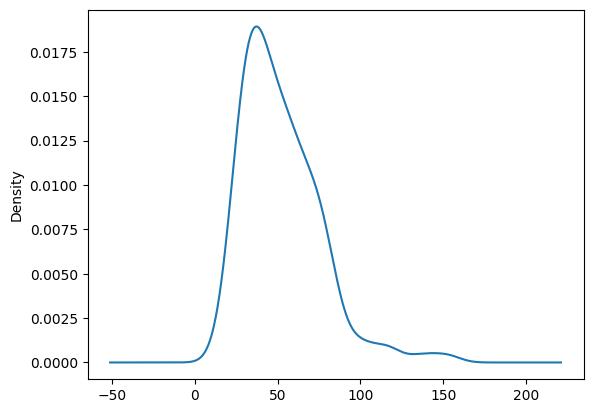

In [19]:
df['LCV'].plot(kind = 'density')

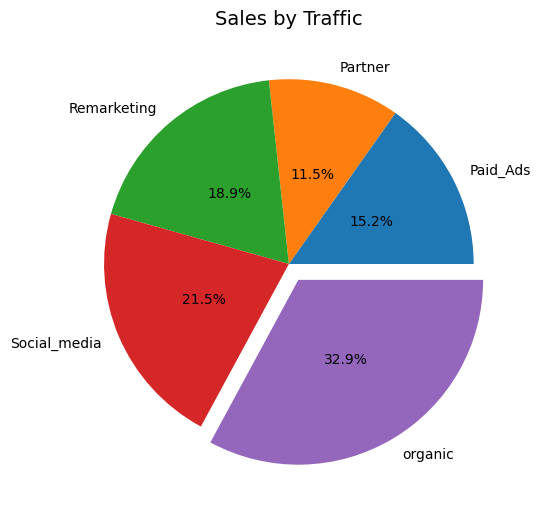

In [20]:
data=df.groupby('Sales_channel')["Sales"].sum()
#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
labels = data.keys()
# declaring exploding pie
explode = [0, 0, 0, 0, 0.1]
plt.pie(x=data, autopct="%.1f%%", explode=explode#[0.05]*5
        , labels=labels, pctdistance=0.5)
plt.title("Sales by Traffic", fontsize=14);
#pie.savefig("Sales by Traffic.png")

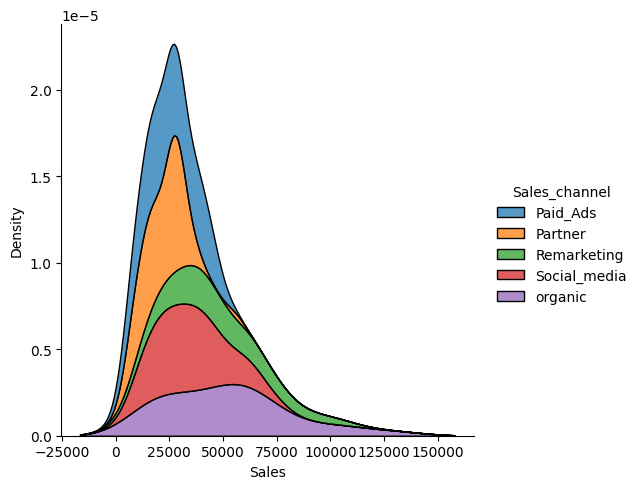

In [21]:
sns.displot(df, x="Sales", hue="Sales_channel", kind="kde", multiple="stack")

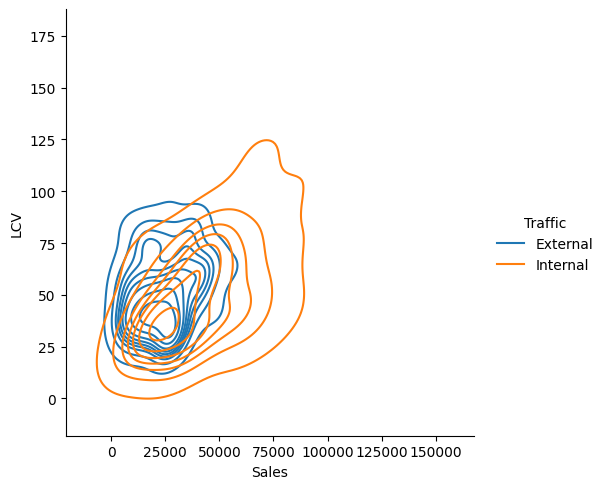

In [22]:
sns.displot(df, x="Sales", y="LCV", hue="Traffic", kind="kde")

[Text(0.5, 1.0, 'SALES Frequency Distribution')]

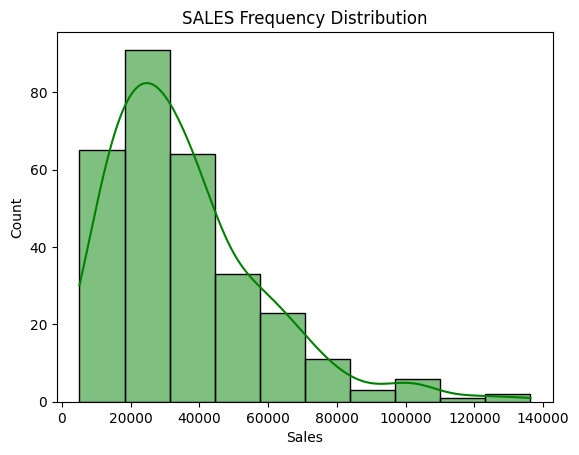

In [23]:
sns.histplot(x=df['Sales'], bins=10, color='green' ,kde=True).set(title='SALES Frequency Distribution')

[Text(0.5, 1.0, 'LCV Frequency Distribution')]

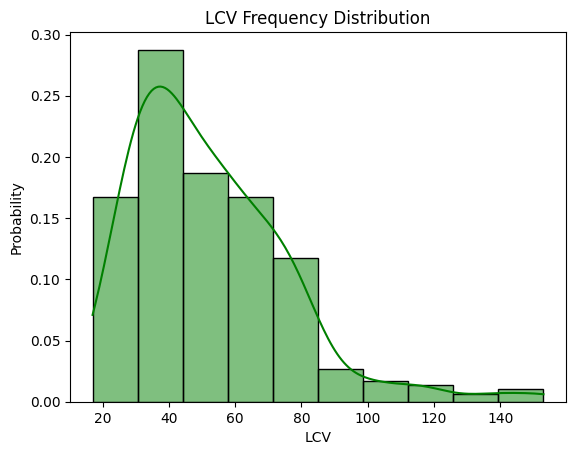

In [24]:
sns.histplot(x=df['LCV'], bins=10,stat="probability", color='green' ,kde=True).set(title='LCV Frequency Distribution')

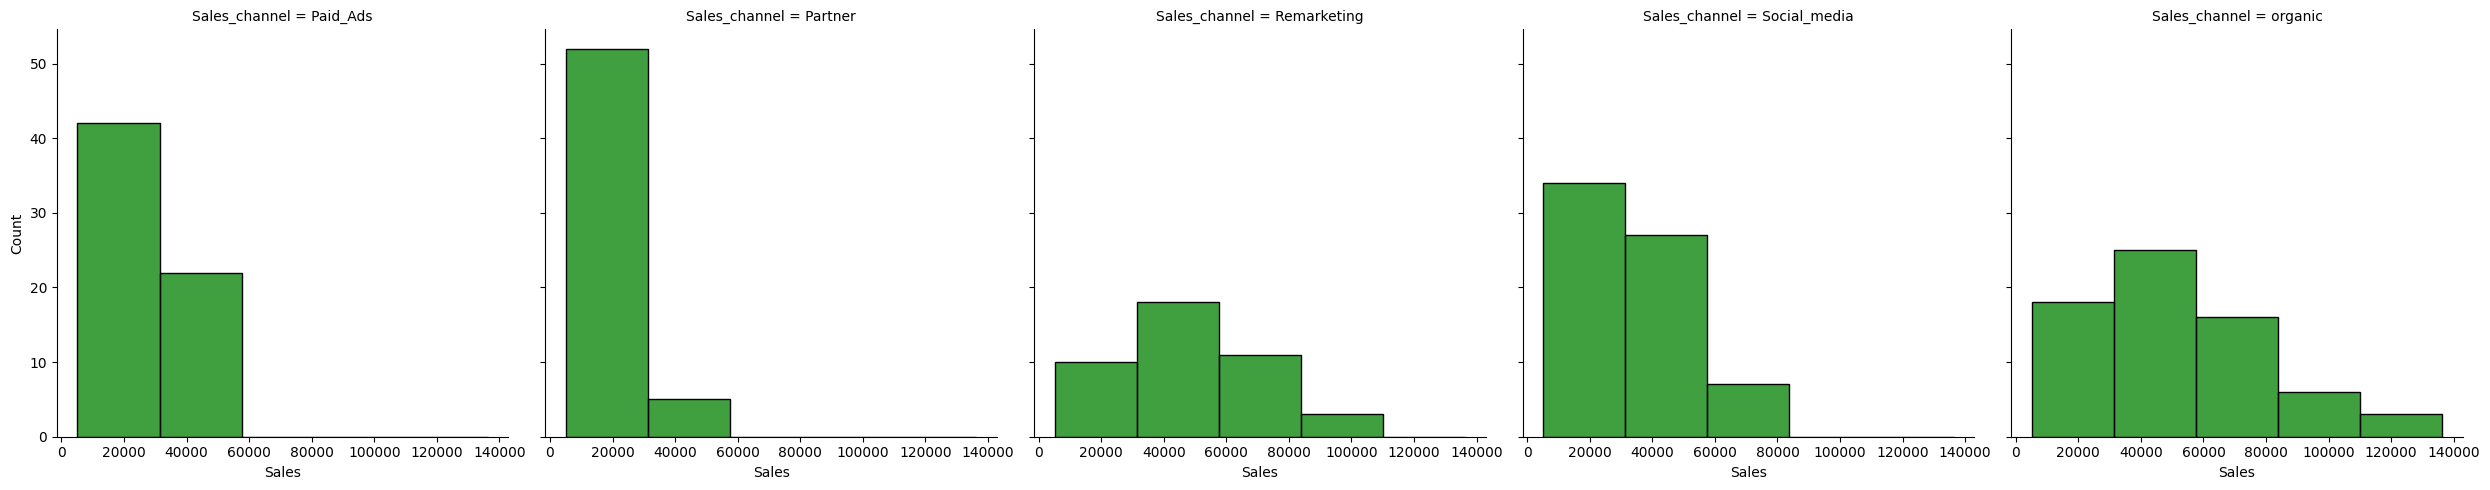

In [25]:
sns.displot(df,x=df['Sales'], bins=5,col="Sales_channel",color='green')

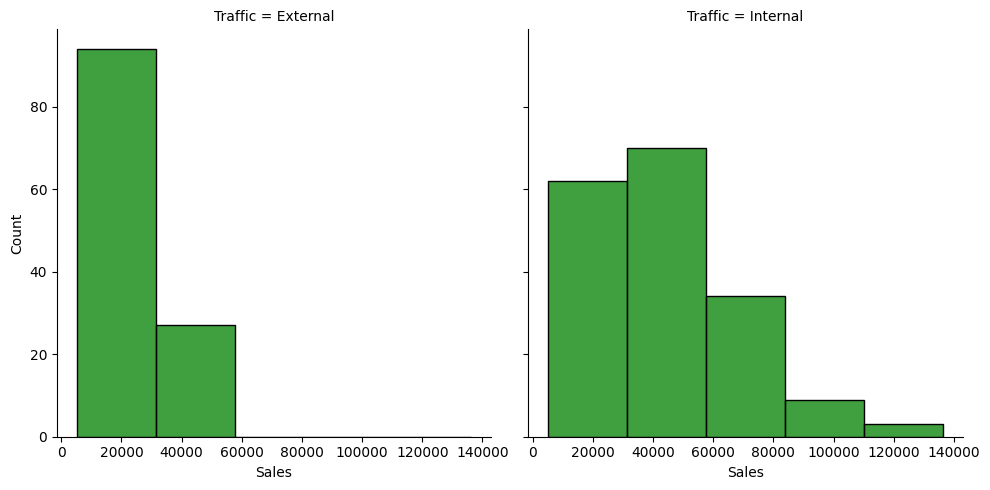

In [26]:
sns.displot(df,x=df['Sales'], bins=5,col="Traffic",color='green')

In [27]:
# Removing the outliers
def removeOutliers(data, col):
	Q3 = np.quantile(data[col], 0.75)
	Q1 = np.quantile(data[col], 0.25)
	IQR = Q3 - Q1

	print("IQR value for column %s is: %s" % (col, IQR))
	global outlier_free_list
	global filtered_data

	lower_range = Q1 - 1.5 * IQR
	upper_range = Q3 + 1.5 * IQR
	outlier_free_list = [x for x in data[col] if (
		(x > lower_range) & (x < upper_range))]
	filtered_data = data.loc[data[col].isin(outlier_free_list)]


for i in num_data.columns:
    if i == num_data.columns[0]:
        removeOutliers(num_data, i)
else:
    removeOutliers(filtered_data, i)


# Assigning filtered data back to our original variable
data = filtered_data
print("Shape of data after outlier removal is: ", data.shape)


IQR value for column Month is: 44755200000000000 nanoseconds
IQR value for column Cross sales is: 7387.0
Shape of data after outlier removal is:  (286, 8)


[Text(0.5, 1.0, 'SALES Distribution')]

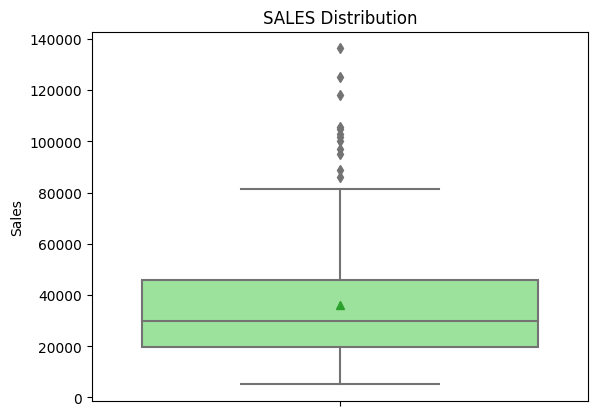

In [28]:
sns.boxplot(y=df['Sales'],  color='lightgreen', showmeans=True).set(title='SALES Distribution')


# Gap analysis
we want to determine whether SALES Of Mobile Device is different from SALES of Desktop. We will perform the Gap Analsysis in 2 forms Visual and Statsitical

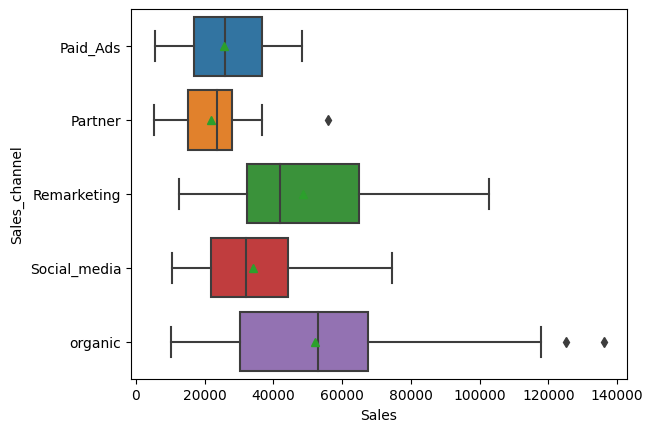

In [29]:
sns.boxplot(x=df['Sales'], y=df['Sales_channel'], showmeans=True);

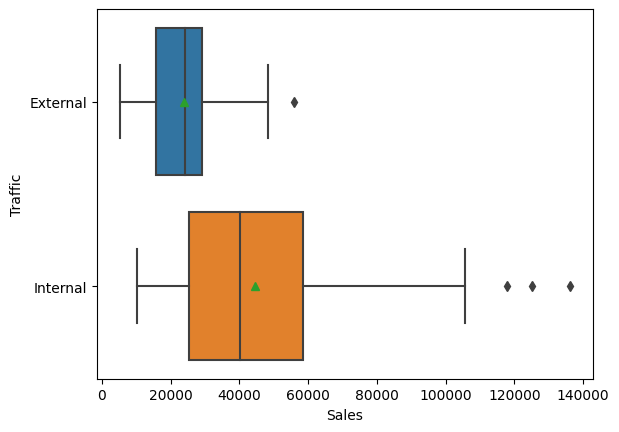

In [30]:
sns.boxplot(x=df['Sales'], y=df['Traffic']#,hue=df['Device']
            , showmeans=True);

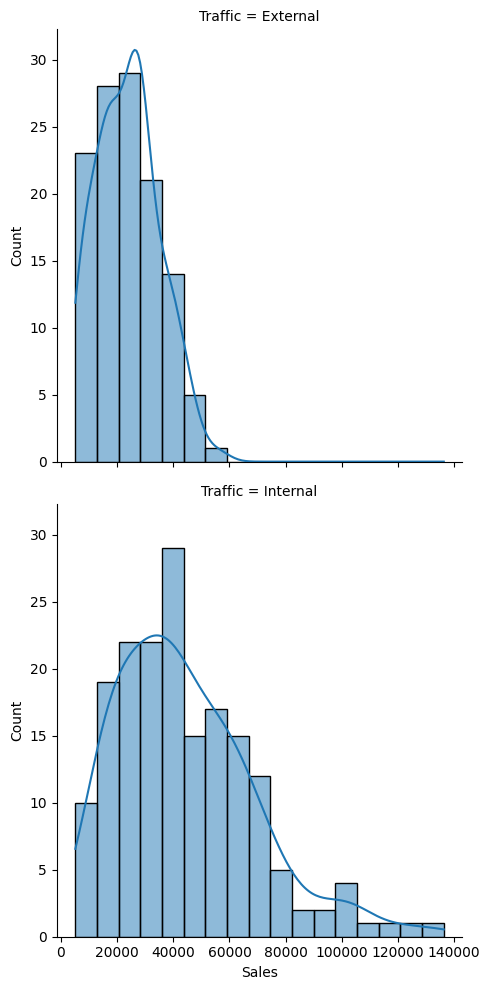

In [31]:
sns.displot(x='Sales', row='Traffic', data=df, linewidth=1, kde=True);

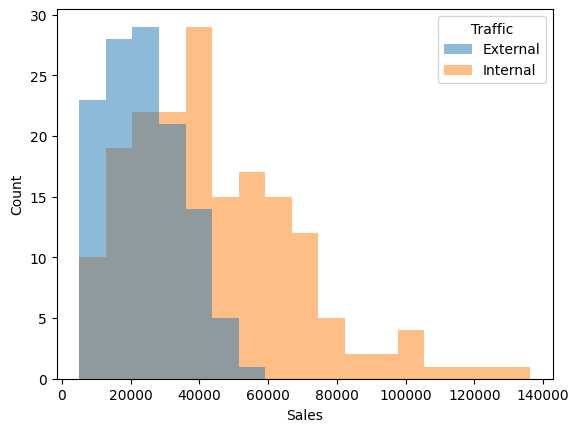

In [32]:
sns.histplot(x='Sales', hue='Traffic', data=df, linewidth=0);

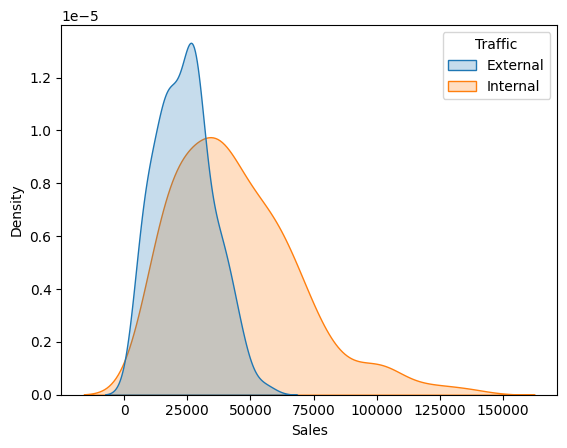

In [33]:
sns.kdeplot(x='Sales', hue='Traffic', data=df, fill=True);

<Axes: xlabel='Sales', ylabel='Cross sales'>

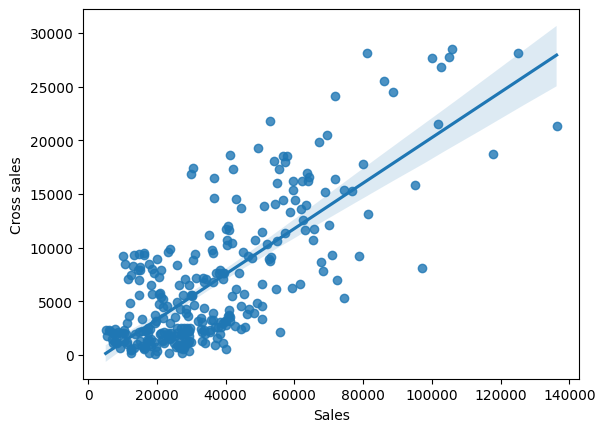

In [34]:
sns.regplot(data = df, x="Sales", y="Cross sales", ci=95)

# 2.Inferential Statistics
Inferential Statistics invloves drawing conclusions and making inferences about a population based on a sample of data taken from that population. Instead of examining every individual in a population, inferential statistics allows researchers to generalize findings from a sample to the larger population.

The process typically includes hypothesis testing, estimation, and prediction. Researchers use inferential statistics to analyze patterns, relationships, and trends observed in the sample data and then make predictions or draw inferences about the broader population. This allows for more efficient and cost-effective analysis, as studying an entire population may be impractical or impossible in many cases.

Common techniques in inferential statistics include confidence intervals, hypothesis testing (such as t-tests and chi-square tests), regression analysis, and analysis of variance (ANOVA). These methods help researchers make informed decisions and predictions based on limited data, provided that the sample is representative of the population of interest.


Data Sampling


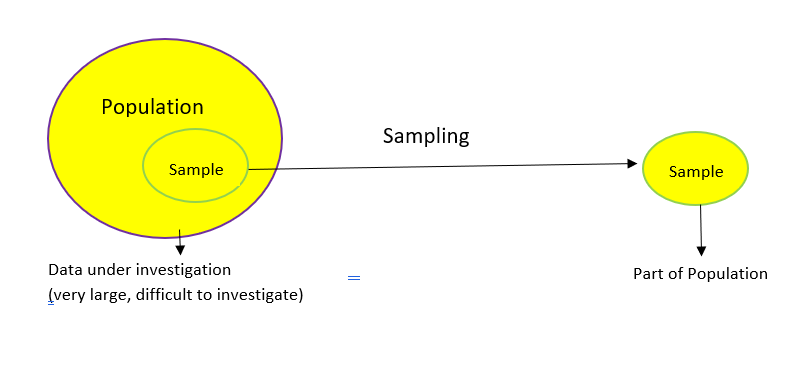

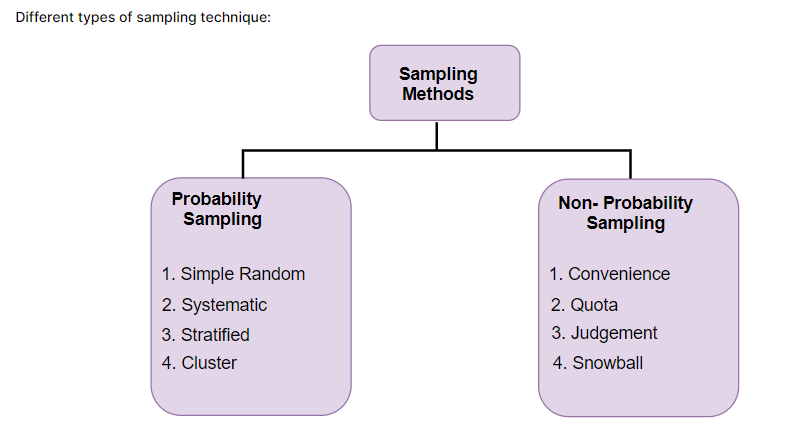

# Probability Distribuions

# T-Test
When to use T-Test

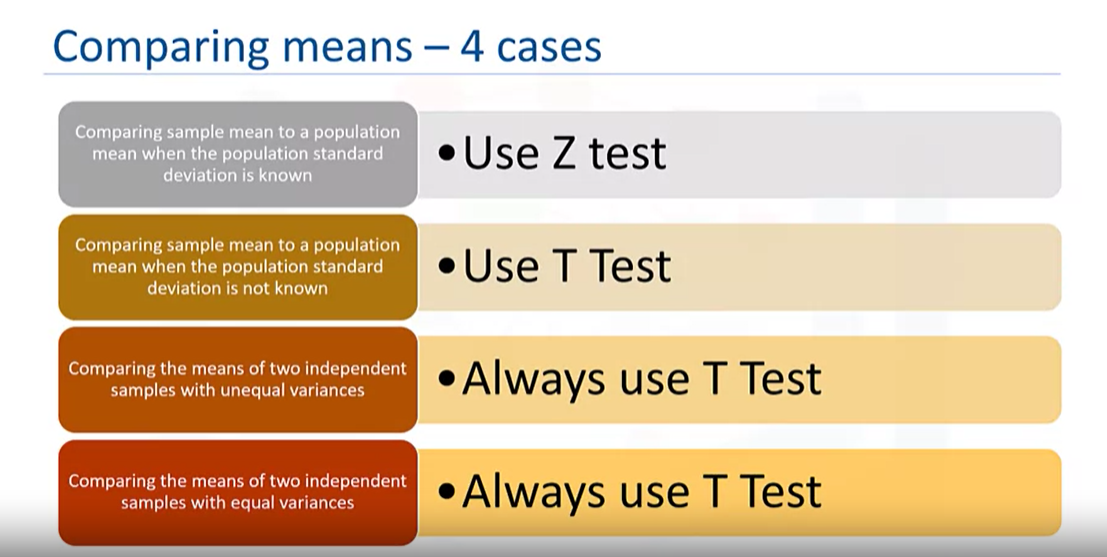

We want to see if the traffic type has an impact on the LCV. In order to compare the average of LCV by Internal vs external traffic we need to set up statistical hypothesis testing.


*   H0 (Null hypothesis) = the average (mean) of LCV for internal traffic **is higher than** of the average (mean) of LCV for External traffic.
*   Ha (alternative hypothesis): the average (mean) of LCV for internal traffic **is not higher than** of the average (mean) of LCV for External traffic.

I will be using t-test at this point to test the hypothesis that two distributions have the same sample mean (and thus are “the same”—or at least close enough). [More on t-Test](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/one-sample-t-test/)

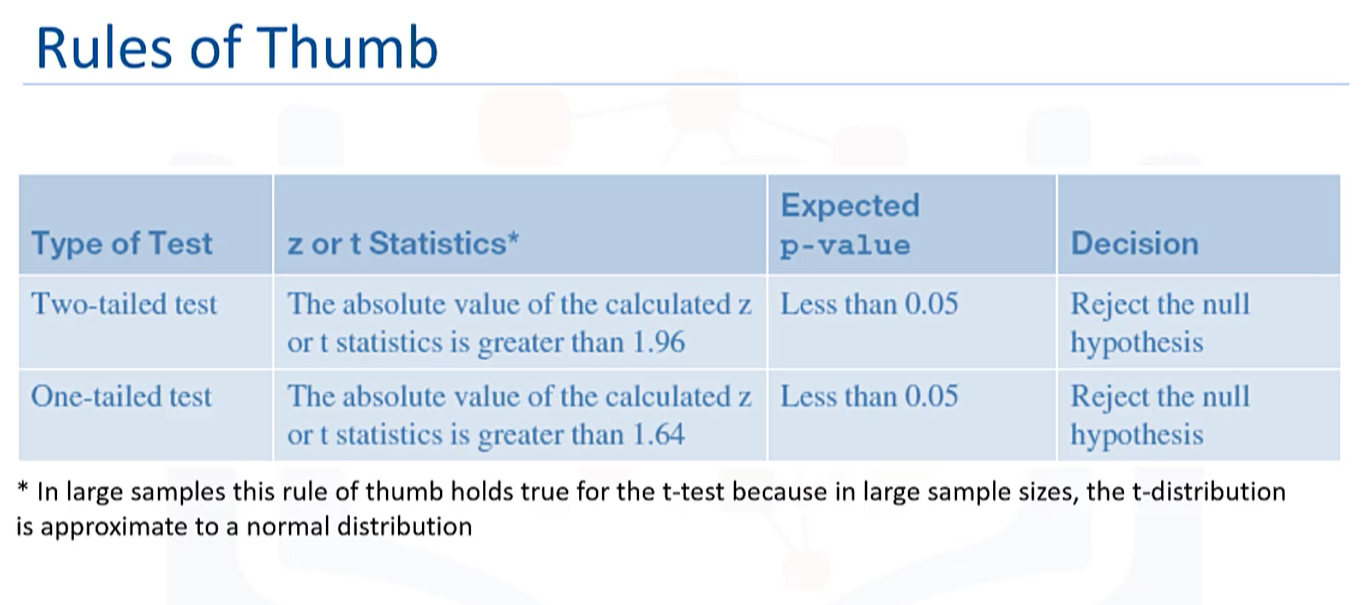

In [35]:
Internal = df[df['Traffic'] == "Internal"]['LCV']
External = df[df['Traffic'] == "External"]['LCV']

The Statistical Distribution of LCV

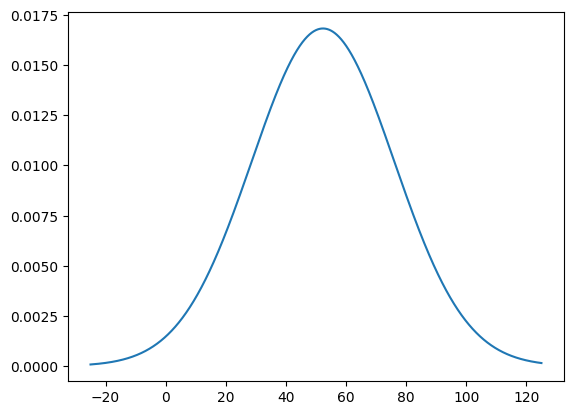

In [36]:
# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(-25, 125, 0.01)

# Calculating mean and standard deviation
mean= round(df['LCV'].mean(),3)
std= round(df['LCV'].std(),3)

plt.plot(x_axis, norm.pdf(x_axis, mean, std))
plt.show()

Before running the t-Test we are requierd to run equality of variance test. R uses the F-test to determine whether the variances of the two samples are similar enough to be considered “the same”. Scipy, a popular Python library for statistics, offers two diffrent and more refnied tests: Levene’s test and Bartlett’s test. I will use Levene’s test here:
The null hypothesis there is that the population variances are equal.

In [37]:
from scipy import stats
stats.levene(Internal, External,center='mean')

LeveneResult(statistic=22.798951671856944, pvalue=2.8285035673891723e-06)

Since the p value is less than 0.05, we can reject the null hypothesis and assume that the variances are unequal. Now let's run the t-Test
*note: we have to set the equal_var=False since based on the Levene test we rejected the euality of variances.

In [38]:
import scipy.stats
scipy.stats.ttest_ind(Internal, External,equal_var=False)

TtestResult(statistic=1.4586961489262498, pvalue=0.14572748608722566, df=290.9365461333479)

Since the calculated t statstic value is less than 1.64 and the pvalue is grater than 0.05 (the Alpha level of 0.05) we accept our null hypothesis as there is enough evidance that statistically there is no diffrence in contibution to LCV for internal and external Traffic.

Belwo is another way to run the test using statsmodels library.

In [39]:
import statsmodels.stats.api as sms
model1 = sms.CompareMeans.from_data(Internal, External)
model1.summary( usevar='unequal')

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,3.7019,2.538,1.459,0.146,-1.293,8.697


Since the calculated t statstic value is less than 1.64 and the pvalue is grater than 0.05 (the Alpha level of 0.05) we accept our null hypothesis.

Now let's calculate the probability of a type trrafic having LCV of higher than the 35$.[See more](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)

In [40]:
#first lets find the mean and standard deviation
LCV_mean= round(df['LCV'].mean(),3)
LCV_std= round(df['LCV'].std(),3)
print(LCV_mean,LCV_std)

52.328 23.705


Z-scores always gets us the area to the left of Normal distribution curve [Read more](https://www.mathsisfun.com/data/standard-normal-distribution.html) which is less than 35.Since we want the values higher than 35 (that is the area to the right) then we remove the value from 1.

In [41]:
probability= scipy.stats.norm.cdf((35-LCV_mean)/LCV_std)
print(1-probability)

0.767605849850896


# Analysis of variance of Sales Channels' LCV

Here we want to compare the average values of LCV for Sales Channels which is more than 2 groups then we would have to use analysis of variance Test (ANOVA). [Read more on ANOVA](https://learning.edanz.com/anova-explained/)

*   H0 (Null hypothesis):         LCV **don't differ** by Sales_channels.
*   Ha (alternative hypothesis):  At least one of the Sales_channels has a **different** LCV .

In [42]:
df.groupby("Sales_channel").size()

Sales_channel
Paid_Ads        64
Partner         57
Remarketing     42
Social_media    68
organic         68
dtype: int64

In [43]:
df.groupby("Sales_channel")[["LCV"]].mean()

,LCV
Sales_channel,
Paid_Ads,53.656250
Partner,46.157895
Remarketing,59.738095
Social_media,44.323529
organic,59.676471


In [44]:
Paid_Ads=df[df['Sales_channel']=='Paid_Ads']['LCV']
Partner=df[df['Sales_channel']=='Partner']['LCV']
Remarketing=df[df['Sales_channel']=='Remarketing']['LCV']
organic=df[df['Sales_channel']=='organic']['LCV']
Social_media=df[df['Sales_channel']=='Social media']['LCV']

In [45]:
f_statistic, p_value= scipy.stats.f_oneway(Paid_Ads,Partner,Remarketing,organic,Social_media)
print("f_statistic: {0}, p-value: {1}".format(f_statistic, p_value))

f_statistic: nan, p-value: nan


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

# Correlation Test

A correlation test is used to determine whether there is a relationship between two or more variables. It measures the strength and direction of the relationship between variables, and the result is a number between -1 and 1. A value of 1 indicates a perfect positive correlation, while a value of -1 indicates a perfect negative correlation. A value of 0 indicates no correlation between the variables 1.

Hre I want to find out if there is a correlation between Device type and and Traffic type.The test will give me a correlation coefficient, which will tell me the strength and direction of the relationship between the two variables 2.

What test to use?

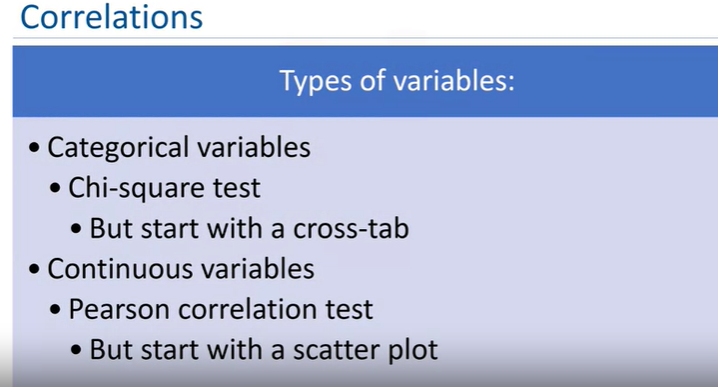

𝐻0:There is no association between Device and Traffic Type.

𝐻1:There is an association between Device and Traffic Type.

In [46]:
#Creating a cross tab
cont_table  = pd.crosstab(df['Traffic'],df['Device'])
cont_table

Device,desktop,mobile
Traffic,,
External,57,64
Internal,76,102


Use the <code>scipy.stats</code> library to perfrome the Chi-square.

In [47]:
scipy.stats.chi2_contingency(cont_table, correction = False)

Chi2ContingencyResult(statistic=0.5674835766397124, pvalue=0.45126061226604375, dof=1, expected_freq=array([[53.82274247, 67.17725753],
       [79.17725753, 98.82274247]]))

** Since the p-value is greater than 0.05, we fail to reject the null hypothesis. As there is no sufficient evidence that Traffic types are not affecting the Device type of sales.

Now, lets check to see if there is a **corelation** between LCV and cost. Since they are both continuous variables we can use a pearson correlation test and draw a scatter plot.

* $H_0:$ LCV is not correlated with Cost.

* $H_1:$ LCV is correlated with Cost.

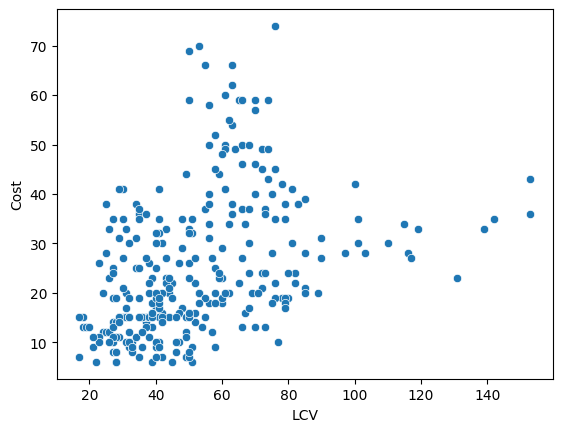

In [48]:
ax = sns.scatterplot(x="LCV", y="Cost", data=df)

In [49]:
scipy.stats.pearsonr(df['LCV'], df['Cost'])

PearsonRResult(statistic=0.40184225401127993, pvalue=4.96429717008333e-13)

Since the p-value is less than 0.05, we reject the Null hypothesis and conclude that there exists a relationship between LCV and Cost.
Remembring that pearson correlation measures the strength and direction of the relationship between variables, and the result is a number between -1 and 1. A value of 1 indicates a perfect positive correlation, while a value of -1 indicates a perfect negative correlation. A value of 0 indicates no correlation between the variables 1. Since our **correlation coefficient is 0.25** and it is higher than 0 but less than one and closer to zero then we can conclude that there is a rather weak correlation between the LCV and cost.

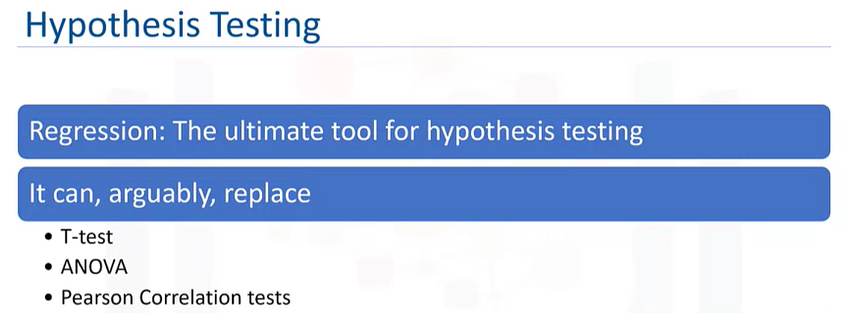

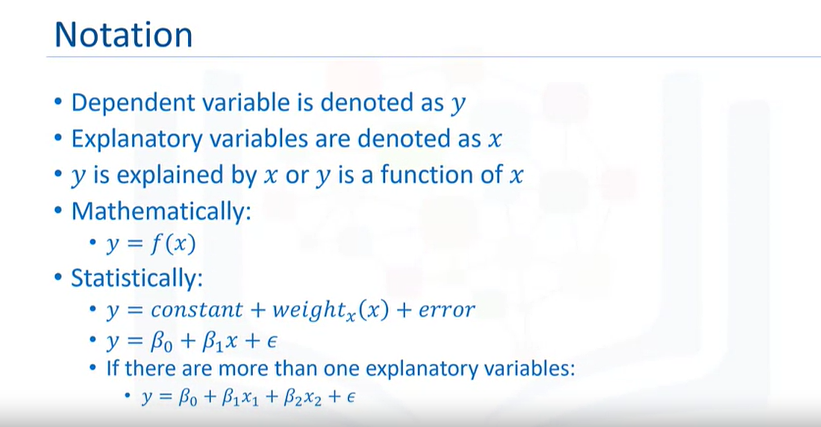

I am going to use Regression models to answer the above questions.

The First question was, is there a statistically significant difference in CV for Internal vs external traffic? Instead of T-test I am going to use regression.

In [50]:
Inavg=Internal.mean()
Exavg=External.mean()
print("Inavg: {0}, Exavg: {1}".format(Inavg, Exavg))

Inavg: 53.825842696629216, Exavg: 50.12396694214876


In [51]:
df=pd.get_dummies(df,columns=['Traffic'])

In [52]:
import statsmodels.api as sm
## X is the input variables (or independent variables)
X = df['Traffic_Internal']
## y is the target/dependent variable
y = df['LCV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X)
model2 = sm.OLS(y, X).fit()
predictions = model2.predict(X)

# Print out the statistics
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LCV   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.761
Date:                Mon, 20 Nov 2023   Prob (F-statistic):              0.185
Time:                        22:49:48   Log-Likelihood:                -1369.4
No. Observations:                 299   AIC:                             2743.
Df Residuals:                     297   BIC:                             2750.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               50.1240      2.152     23.290      0.000      45.888      54.359
Traffic_Internal     3.7019      2.789      1.327      0.185      -1.788       9.191
==============================================================================
Omnibus:                       73.774   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.799
Skew:                           1.254   Prob(JB):                     1.09e-33
Kurtosis:                       5.428   Cond. No.                         2.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since the calculated t statstic value is less than 1.64 and the pvalue is grater than 0.05 (the Alpha level of 0.05) we accept our null hypothesis as there is enough evidance that statistically there is no diffrence in contibution to LCV for internal Traffic.The coefficinet of 3.7 for internal traffic means we are most liklly to gain 3.7 marks for trafffic being internal.

# **Regression diagnostics**


Regression diagnostics involve assessing the quality and appropriateness of a regression model. In the context of statsmodels, a key aspect of this process is examining the residuals. Residuals represent the differences between the observed values (Y) and the values predicted by the linear model.

A foundational assumption in regression analysis is that these residuals, or "errors," should exhibit a random pattern. This randomness implies that some errors will be large, others small, and they can be both positive and negative. The crucial expectation is that, on the whole, the errors are normally distributed around a mean of zero.

Deviation from the assumption of normally distributed residuals is considered a significant issue in the linear model. If the residuals do not follow a normal distribution, it suggests a potential problem with the model's accuracy and appropriateness. Therefore, analyzing the distribution of residuals is a critical step in regression diagnostics to ensure the reliability and validity of the regression model.



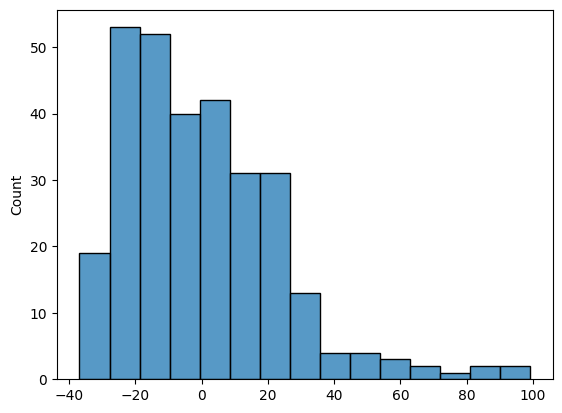

In [53]:
#Histogram of residuals
sns.histplot(model2.resid);

A more insightful method involves comparing the kernel density estimate of residuals with the curve representing a normal distribution. This is achieved by generating a normal curve with the same mean and standard deviation as the observed residuals and plotting it alongside the actual residuals.

In Python, a convenient approach is utilized: the fit() function. This function not only provides the best-fit normal distribution but also returns both the mean and standard deviation. This allows for a more accurate comparison between the observed residuals and the expected normal distribution, aiding in the assessment of the normality assumption in regression analysis.

In [54]:
from scipy import stats
mu, std = stats.norm.fit(model2.resid)
mu, std

(3.61212360653964e-15, 23.59501829538195)

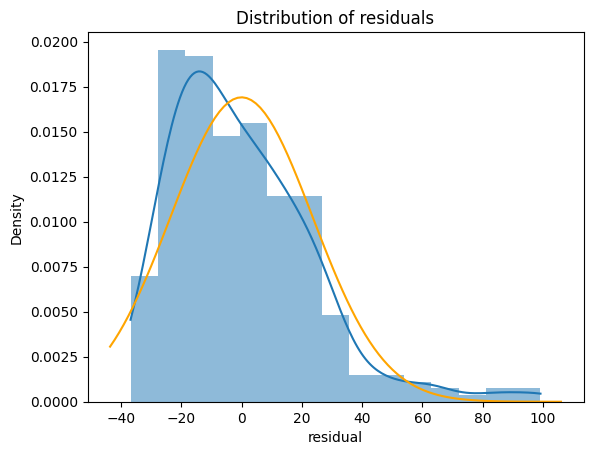

In [55]:
#re-plot the residuals as a kernel density plot and overlay the normal curve with the same mean and standard deviation
fig, ax = plt.subplots()
# plot the residuals
sns.histplot(x=model2.resid, ax=ax, stat="density", linewidth=0, kde=True)
ax.set(title="Distribution of residuals", xlabel="residual")

# plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="orange", ax=ax)
plt.show()

The Q-Q plot is a bit trickier to make compared to a regular histogram or boxplot. To make things simpler, you can use the regression diagnostic plots provided by Statsmodels. These plots might not look as nice as Seaborn plots, but they're specifically made for folks who work with data – the data analysts.

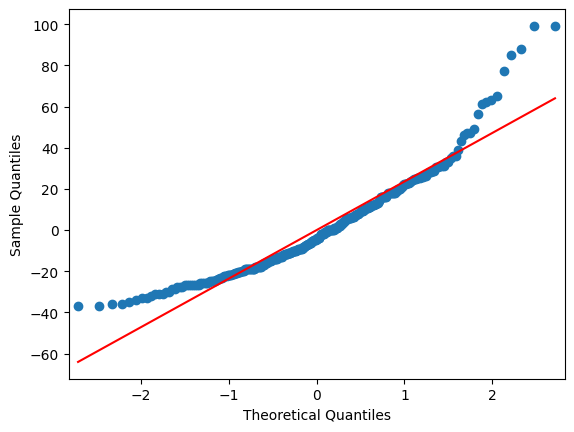

In [56]:
sm.qqplot(model2.resid, line='s');

 In a fit plot, you typically visualize the observed values against the predicted values from the model.

For example, in linear regression, a fit plot might show a scatter plot of the actual data points against the predicted values. If the model fits the data well, you would expect to see the points forming a roughly straight line. Deviations from this line could indicate areas where the model is not accurately capturing the patterns in the data.

Fit plots are valuable tools in regression diagnostics, helping analysts and researchers evaluate the appropriateness and accuracy of their statistical models. They provide a visual way to identify patterns, trends, and potential outliers in the relationship between the predictor variables and the response variable.

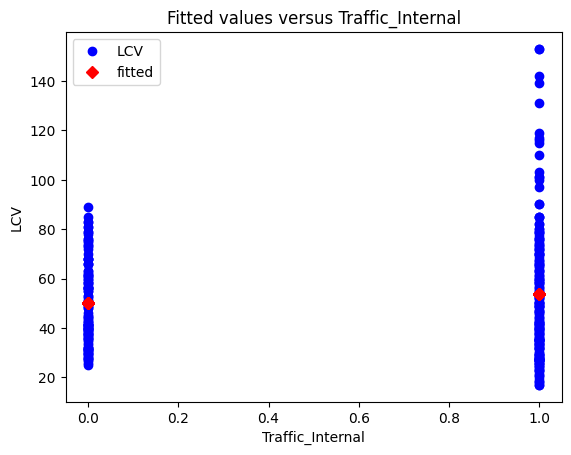

In [57]:
sm.graphics.plot_fit(model2,1, vlines=False);

**Regression in place of ANOVA**

The key question is whether the difference in LCV (Lifetime Customer Value) across various traffic sources is statistically significant or not.

In [58]:
from statsmodels.formula.api import ols
#lm= a linear regression model
lm=ols('LCV~Sales_channel',data=df).fit()
table=sm.stats.anova_lm(lm)
print(table)

                  df         sum_sq      mean_sq         F   PR(>F)
Sales_channel    4.0   12617.979398  3154.494849  5.989938  0.00012
Residual       294.0  154829.900201   526.632314       NaN      NaN


Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

Here is another way to run a regssion model for ANOVA.

In [59]:
df=pd.get_dummies(df,columns=['Sales_channel','Device'])

In [60]:
## X is the input variables (or independent variables)
X = df[['Sales_channel_Paid_Ads','Sales_channel_Partner','Sales_channel_Remarketing','Sales_channel_Social_media','Sales_channel_organic']]
## y is the target/dependent variable
y = df['LCV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X)
model3 = sm.OLS(y,X).fit()
predictions = model3.predict(X)

# Print out the statistics
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LCV   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     5.990
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           0.000120
Time:                        22:49:51   Log-Likelihood:                -1358.6
No. Observations:                 299   AIC:                             2727.
Df Residuals:                     294   BIC:                             2746.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         43.9254      1.124     39.073      0.000      41.713      46.138
Sales_channel_Paid_Ads         9.7309      2.598      3.746      0.000       4.618      14.844
Sales_channel_Partner          2.2325      2.725      0.819      0.413      -3.130       7.595
Sales_channel_Remarketing     15.8127      3.102      5.097      0.000       9.708      21.918
Sales_channel_Social_media     0.3982      2.535      0.157      0.875      -4.591       5.387
Sales_channel_organic         15.7511      2.535      6.213      0.000      10.762      20.740
==============================================================================
Omnibus:                       59.066   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.596
Skew:                           1.076   Prob(JB):                     1.18e-23
Kurtosis:                       4.960   Cond. No.                     5.68e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.12e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

**Regression in place of Correlation**

* $H_0:$ LCV is not correlated with Cost.

* $H_1:$ LCV is correlated with Cost.

In [61]:
## X is the input variables (or independent variables)
X = df['Cost']
## y is the target/dependent variable
y = df['LCV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X)
model4 = sm.OLS(y,X).fit()
predictions = model4.predict(X)

# Print out the statistics
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LCV   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     57.19
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           4.96e-13
Time:                        22:49:51   Log-Likelihood:                -1344.0
No. Observations:                 299   AIC:                             2692.
Df Residuals:                     297   BIC:                             2699.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.6777      2.535     14.072      0.000      30.688      40.667
Cost           0.6675      0.088      7.563      0.000       0.494       0.841
==============================================================================
Omnibus:                       91.561   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.441
Skew:                           1.463   Prob(JB):                     1.83e-49
Kurtosis:                       6.075   Cond. No.                         58.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We get similar results to pearson correlation test.

The p-value (Prob(F-statistic):	4.96e-13) is less than 0.05, we reject the Null hypothesis and conclude that there exists a relationship between LCV and Cost. Remembring that pearson correlation measures the strength and direction of the relationship between variables, and the result is a number between -1 and 1. A value of 1 indicates a perfect positive correlation, while a value of -1 indicates a perfect negative correlation. A value of 0 indicates no correlation between the variables 1. Since our correlation coefficient (here is squer root of R-squared which is 0.40) is higher than 0 but less than one and closer to zero then we can conclude that there is a rather weak correlation between the LCV and cost.

# **Multivariate Linear Regression**

While simple linear regression involves modeling the relationship between a dependent variable and a single independent variable, multivariate linear regression accommodates multiple independent variables.

In multivariate linear regression, the goal is to model the relationship between a dependent variable and two or more independent variables.Multivariate linear regression is a powerful tool for understanding and modeling complex relationships between multiple variables. We will end this project with looking at how cost, device type , and sales channels can impact LCV.

In [62]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model5 = smf.glm(formula="LCV ~ Sales_channel_Paid_Ads+Sales_channel_Partner+Sales_channel_Remarketing+Sales_channel_Social_media+Sales_channel_organic+Device_desktop+Device_mobile",data=df,family=sm.families.Binomial())
result = model5.fit()
print(result.summary() )


                 Generalized Linear Model Regression Results                  
Dep. Variable:                    LCV   No. Observations:                  299
Model:                            GLM   Df Residuals:                      293
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Mon, 20 Nov 2023   Deviance:                   1.2331e+06
Time:                        22:49:51   Pearson chi2:                 4.30e+21
No. Iterations:                     2   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1056: RuntimeWarning: invalid value encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1057: RuntimeWarning: invalid value encountered in log
  n * np.log(1 - mu + 1e-20)) * var_weights


Looking at the P-values, all variables have their p-values smaller than 0.05, and are, therefore, significant predictors.The interpretation of logistic models is different in the manner that the coefficients are understood from the logit perspective. In simple terms, it means that, for the output above, the log odds for 'LCV' increases by 9.662e+16 for each unit of 'Sales_channel_organic', 3.831e+16 for each unit of 'Device_desktop', and so on.